## Load and inspect

In [22]:
import pandas as pd

df = pd.read_csv('data/raw_analyst_ratings.csv')
df.head()
# df.info()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [27]:
unique_stocks = df['stock'].dropna().unique()
print(f"Total unique tickers: {len(unique_stocks)}")
print(sorted(unique_stocks))  # Sorted alphabetically



Total unique tickers: 6204
['A', 'AA', 'AAC', 'AADR', 'AAL', 'AAMC', 'AAME', 'AAN', 'AAOI', 'AAON', 'AAP', 'AAPL', 'AAU', 'AAV', 'AAVL', 'AAWW', 'AAXJ', 'AB', 'ABAC', 'ABAX', 'ABB', 'ABBV', 'ABC', 'ABCB', 'ABCD', 'ABCO', 'ABCW', 'ABDC', 'ABEV', 'ABG', 'ABGB', 'ABIO', 'ABM', 'ABMD', 'ABR', 'ABTL', 'ABX', 'ABY', 'ACAD', 'ACAS', 'ACAT', 'ACC', 'ACCO', 'ACCU', 'ACE', 'ACET', 'ACFC', 'ACFN', 'ACG', 'ACGL', 'ACH', 'ACHC', 'ACHN', 'ACIW', 'ACLS', 'ACM', 'ACMP', 'ACN', 'ACNB', 'ACOR', 'ACP', 'ACPW', 'ACRE', 'ACRX', 'ACSF', 'ACST', 'ACT', 'ACTA', 'ACTG', 'ACTS', 'ACU', 'ACUR', 'ACWI', 'ACWV', 'ACWX', 'ACXM', 'ACY', 'ADAT', 'ADBE', 'ADC', 'ADEP', 'ADES', 'ADGE', 'ADHD', 'ADI', 'ADK', 'ADM', 'ADMA', 'ADMP', 'ADMS', 'ADNC', 'ADP', 'ADPT', 'ADRA', 'ADRD', 'ADRE', 'ADRU', 'ADS', 'ADSK', 'ADT', 'ADTN', 'ADVS', 'ADX', 'ADXS', 'ADZ', 'AE', 'AEB', 'AEC', 'AEE', 'AEG', 'AEGN', 'AEGR', 'AEHR', 'AEIS', 'AEL', 'AEM', 'AEO', 'AEPI', 'AER', 'AERI', 'AES', 'AET', 'AETI', 'AEY', 'AEZS', 'AF', 'AFA', 'AFAM', 'AF

## Textual Lengths (Headline or Summary)

In [33]:
df['headline_length'] = df['headline'].apply(len)

# Basic statistics
headline_stats = df['headline_length'].describe()
print("📊 Headline Length Statistics:")
print(headline_stats)

📊 Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [34]:
# Ensure publisher column exists
df['publisher'] = df['publisher'].astype(str)

# Count articles per publisher
publisher_counts = df['publisher'].value_counts()
print("\n📰 Top Publishers by Article Count:")
print(publisher_counts.head(10))



📰 Top Publishers by Article Count:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


In [10]:
df['text_length'] = df['headline'].astype(str).apply(len)
df['word_count'] = df['headline'].astype(str).apply(lambda x: len(x.split()))
print(df[['text_length', 'word_count']].describe())


        text_length    word_count
count  1.407328e+06  1.407328e+06
mean   7.312051e+01  1.141671e+01
std    4.073531e+01  6.352997e+00
min    3.000000e+00  1.000000e+00
25%    4.700000e+01  7.000000e+00
50%    6.400000e+01  1.000000e+01
75%    8.700000e+01  1.300000e+01
max    5.120000e+02  7.700000e+01


## Articles per Publisher

<Axes: title={'center': 'Top 10 Publishers'}, xlabel='publisher'>

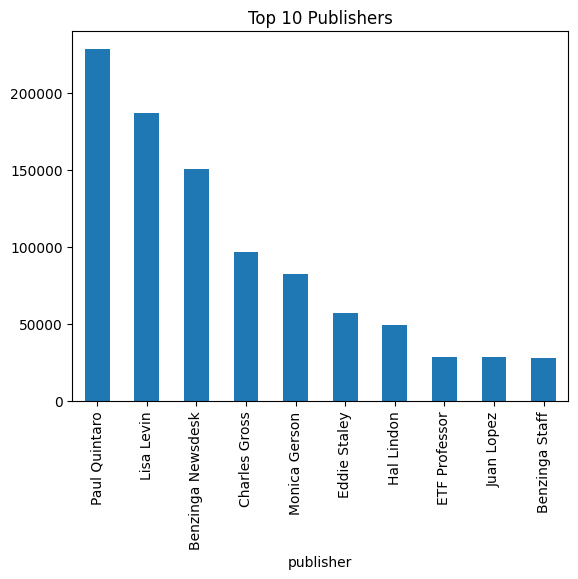

In [ ]:
df['publisher'].value_counts().head(10).plot(kind='bar', title='Top 10 Publishers')


## Publication Dates

/tmp/ipykernel_12187/2665635264.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


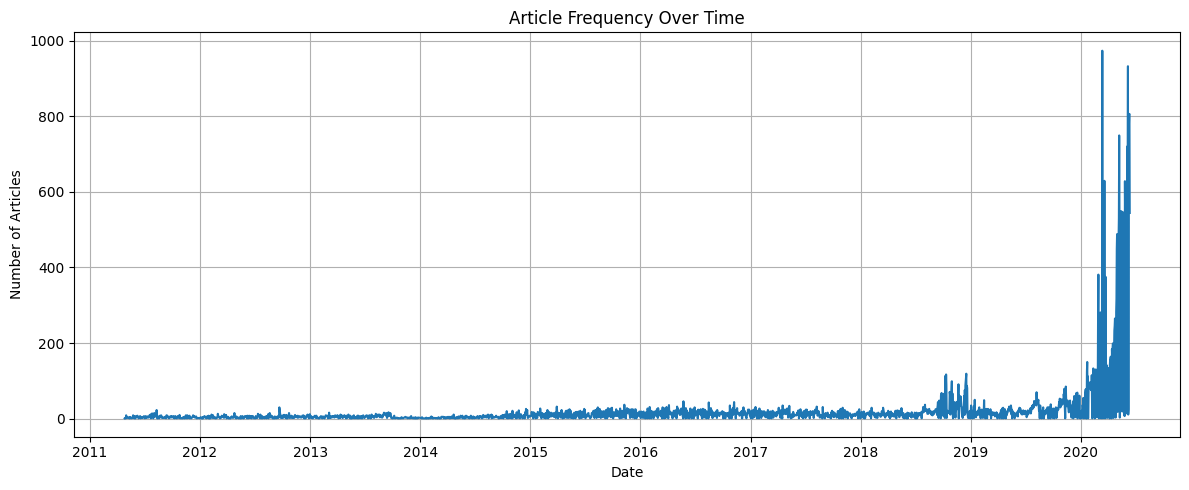

In [43]:
import matplotlib.pyplot as plt

# Convert publication date to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop nulls after conversion
df = df.dropna(subset=['date'])

# Group by date
articles_per_day = df.groupby(df['date'].dt.date).size()

# Line plot
articles_per_day.plot(figsize=(12, 5), title="Article Frequency Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.tight_layout()
plt.show()


stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
NFLX    3028
M       3025
EBAY    3018
GILD    2968
VZ      2966
QCOM    2941
JNJ     2928
DAL     2926
BABA    2858
KO      2797
AA      2739
EWU     2702
ORCL    2701
FDX     2629
HD      2612
Name: count, dtype: int64


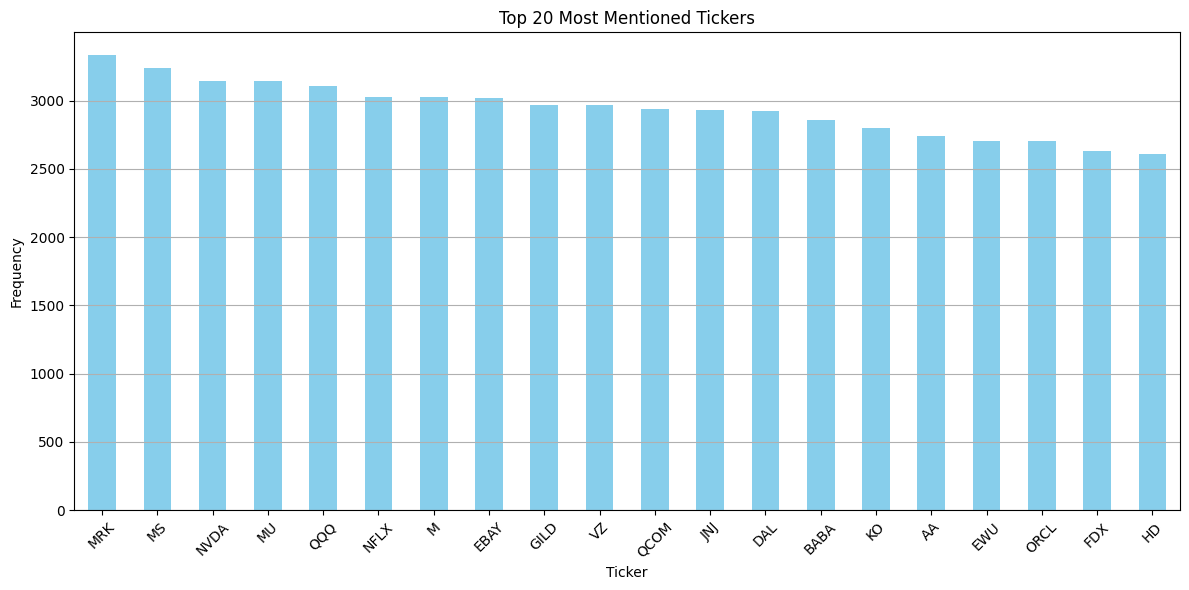

In [29]:
import matplotlib.pyplot as plt

# Top 20 most frequently mentioned tickers
stock_counts = df['stock'].value_counts().head(20)
print(stock_counts)


stock_counts.head(20).plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title('Top 20 Most Mentioned Tickers')
plt.xlabel('Ticker')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Publication Date Trends


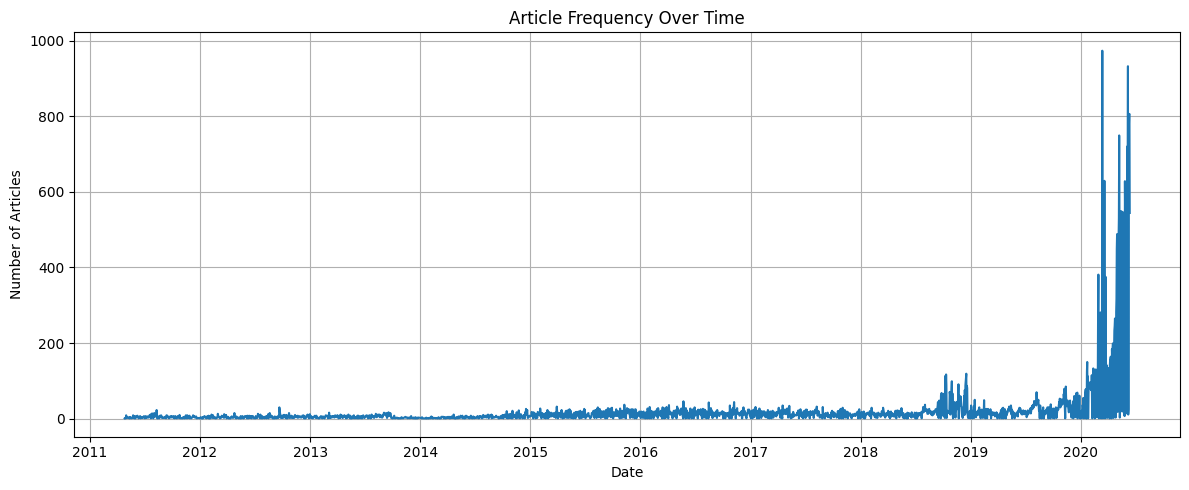

In [45]:
# Convert publication date to datetime
df['published_date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop nulls after conversion
df = df.dropna(subset=['published_date'])

# Group by date
articles_per_day = df.groupby(df['published_date'].dt.date).size()

# Line plot
articles_per_day.plot(figsize=(12, 5), title="Article Frequency Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.tight_layout()
plt.show()

# Text Analysis (Topic Modeling)

## Topic Modeling using LDA

In [46]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /home/abel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/abel/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [48]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Basic cleaning
df['clean_headline'] = df['headline'].astype(str).str.lower()
df['clean_headline'] = df['clean_headline'].apply(lambda x: re.sub(r'[^\w\s]', '', x))


In [49]:
stop_words = set(stopwords.words('english'))

# Tokenize and remove stopwords
df['tokens'] = df['clean_headline'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])


📊 Top 20 Frequent Words:
[('stocks', 12796), ('shares', 8374), ('52week', 8249), ('trading', 6573), ('hit', 5898), ('eps', 5530), ('price', 5043), ('companies', 4778), ('target', 4675), ('several', 4650), ('sales', 4422), ('higher', 4269), ('market', 4025), ('estimate', 3818), ('lows', 3741), ('us', 3411), ('session', 3394), ('maintains', 3266), ('new', 3107), ('yesterday', 3049)]


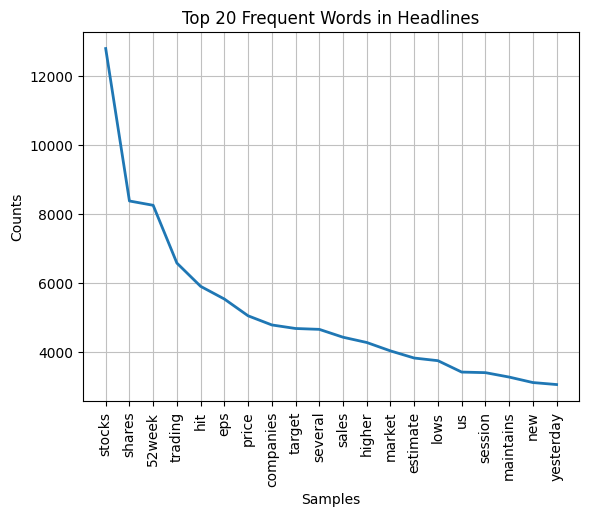

In [50]:
from nltk import FreqDist

# Flatten all tokens into a single list
all_words = [word for tokens in df['tokens'] for word in tokens]

# Frequency distribution
freq_dist = FreqDist(all_words)

# Most common words
print("📊 Top 20 Frequent Words:")
print(freq_dist.most_common(20))

# Optional: Plot
import matplotlib.pyplot as plt

freq_dist.plot(20, title="Top 20 Frequent Words in Headlines")
plt.show()


In [51]:
from nltk.util import ngrams
from collections import Counter

# Extract bigrams from all headlines
all_bigrams = [bigram for tokens in df['tokens'] for bigram in ngrams(tokens, 2)]

# Count bigrams
bigram_freq = Counter(all_bigrams)

print("🔑 Top 20 Bigrams (2-word phrases):")
for phrase, freq in bigram_freq.most_common(20):
    print(' '.join(phrase), ":", freq)


🔑 Top 20 Bigrams (2-word phrases):
stocks hit : 5847
hit 52week : 5846
price target : 4585
shares several : 4438
companies trading : 4082
52week lows : 3687
trading higher : 3516
stocks moving : 2841
52week highs : 2558
trading lower : 2152
new 52week : 2094
stocks set : 2057
set new : 2057
raises price : 1911
biggest movers : 1890
lowers price : 1769
lows thursday : 1764
52week low : 1736
q1 eps : 1675
estimate sales : 1538


# Time Series Analysis
## Frequency Over Time

In [53]:
df['date'] = pd.to_datetime(df['date'])

# Optional: check if time is included
print(df['date'].head())


0   2020-06-05 10:30:54-04:00
1   2020-06-03 10:45:20-04:00
2   2020-05-26 04:30:07-04:00
3   2020-05-22 12:45:06-04:00
4   2020-05-22 11:38:59-04:00
Name: date, dtype: datetime64[ns, UTC-04:00]


/tmp/ipykernel_12187/3378829344.py:13: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/abel/Downloads/tenx-stock-sentiment-analysis/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


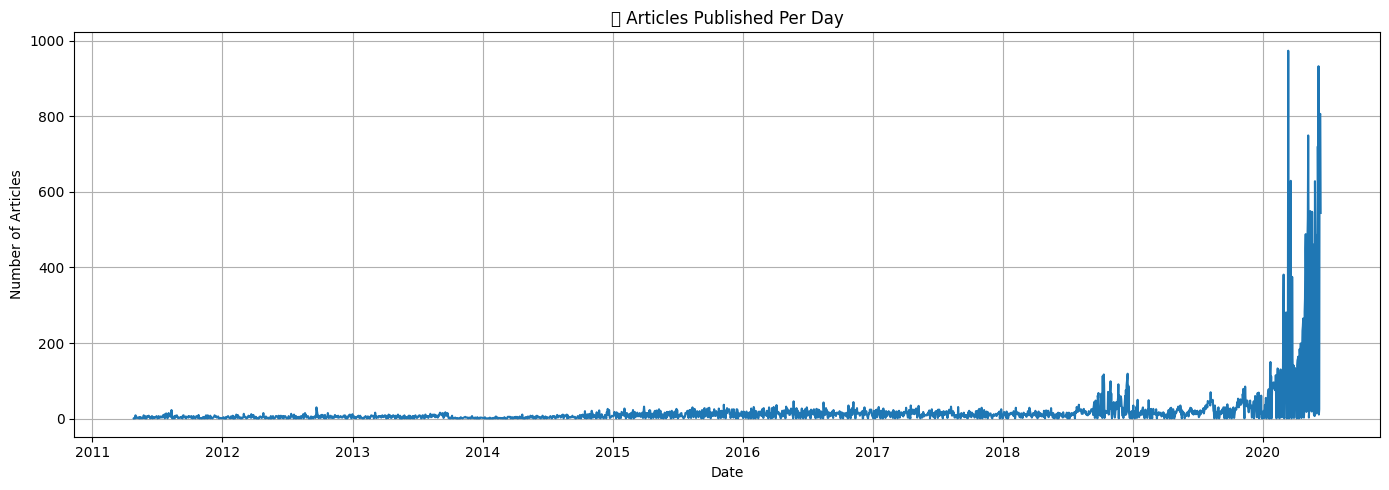

In [54]:
# Group by day
daily_counts = df.groupby(df['date'].dt.date).size()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
daily_counts.plot(kind='line')
plt.title("📅 Articles Published Per Day")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.tight_layout()
plt.show()


/home/abel/Downloads/tenx-stock-sentiment-analysis/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


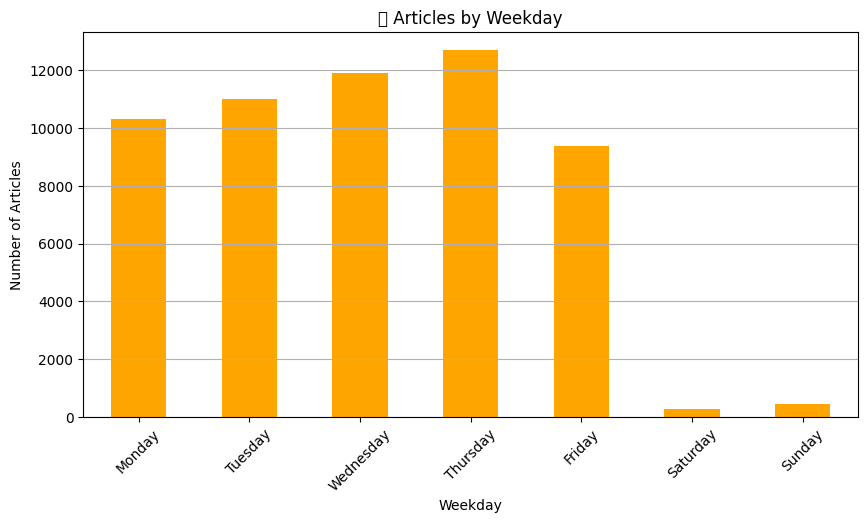

In [55]:
# Map weekdays
df['weekday'] = df['date'].dt.day_name()

weekday_counts = df['weekday'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot
weekday_counts.plot(kind='bar', color='orange', figsize=(10, 5))
plt.title("🗓️ Articles by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


## Hourly Patterns (If Time Exists)

/home/abel/Downloads/tenx-stock-sentiment-analysis/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


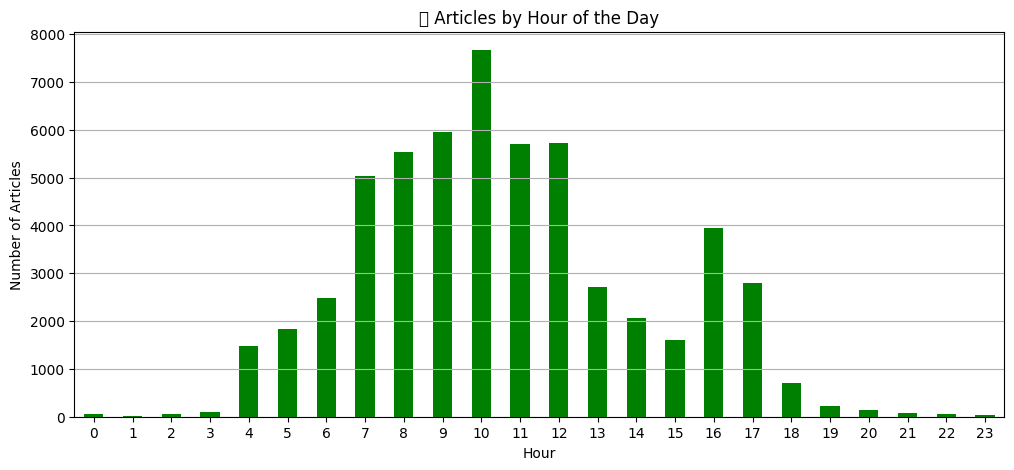

In [56]:
# Only if time is present in datetime
if df['date'].dt.hour.isna().sum() == 0:
    df['hour'] = df['date'].dt.hour
    hourly_counts = df['hour'].value_counts().sort_index()

    hourly_counts.plot(kind='bar', color='green', figsize=(12, 5))
    plt.title("⏰ Articles by Hour of the Day")
    plt.xlabel("Hour")
    plt.ylabel("Number of Articles")
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()
else:
    print("Time data not available in 'date' column.")


# Publisher Analysis
## Top Publishers

<Axes: title={'center': 'Top 10 Most Active Publishers'}, ylabel='publisher'>

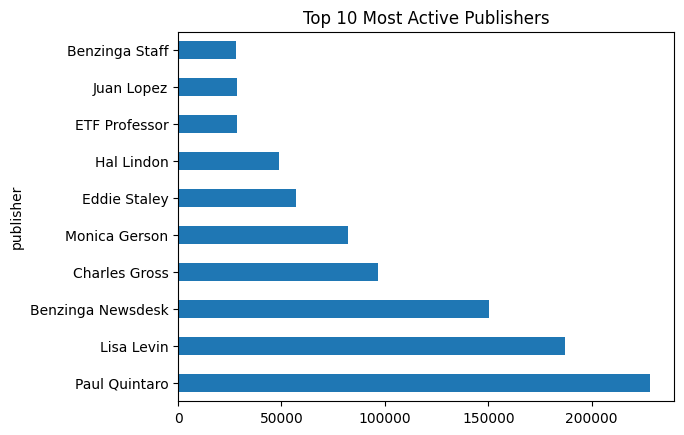

In [17]:
top_publishers = df['publisher'].value_counts().head(10)
top_publishers.plot(kind='barh', title='Top 10 Most Active Publishers')


## Ratings by Publisher

In [57]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Clean and tokenize headlines
stop_words = set(stopwords.words('english'))

def extract_keywords(text):
    words = word_tokenize(str(text).lower())
    return [word for word in words if word.isalpha() and word not in stop_words]

# Let's take the top 3 publishers
top3_publishers = df['publisher'].value_counts().head(3).index.tolist()

for pub in top3_publishers:
    headlines = df[df['publisher'] == pub]['headline']
    tokens = []
    for line in headlines:
        tokens.extend(extract_keywords(line))
    most_common = Counter(tokens).most_common(10)
    print(f"\n📰 Top keywords for publisher: {pub}")
    for word, freq in most_common:
        print(f"   {word}: {freq}")


[nltk_data] Downloading package punkt to /home/abel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/abel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



📰 Top keywords for publisher: Benzinga Newsdesk
   eps: 3845
   estimate: 3601
   sales: 3390
   stocks: 3090
   shares: 3044
   trading: 2884
   new: 2389
   yoy: 2229
   set: 2104
   low: 1773

📰 Top keywords for publisher: Lisa Levin
   stocks: 6963
   hit: 4694
   lows: 3208
   thursday: 2396
   biggest: 2319
   movers: 2028
   friday: 1887
   moving: 1842
   session: 1842
   highs: 1774

📰 Top keywords for publisher: ETF Professor
   etfs: 2386
   etf: 1545
   watch: 351
   bond: 265
   new: 257
   dividend: 211
   could: 178
   september: 161
   emerging: 150
   markets: 134


## Email Domain Analysis

/tmp/ipykernel_12187/1353615401.py:18: UserWarning: Glyph 128236 (\N{OPEN MAILBOX WITH RAISED FLAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/abel/Downloads/tenx-stock-sentiment-analysis/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128236 (\N{OPEN MAILBOX WITH RAISED FLAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


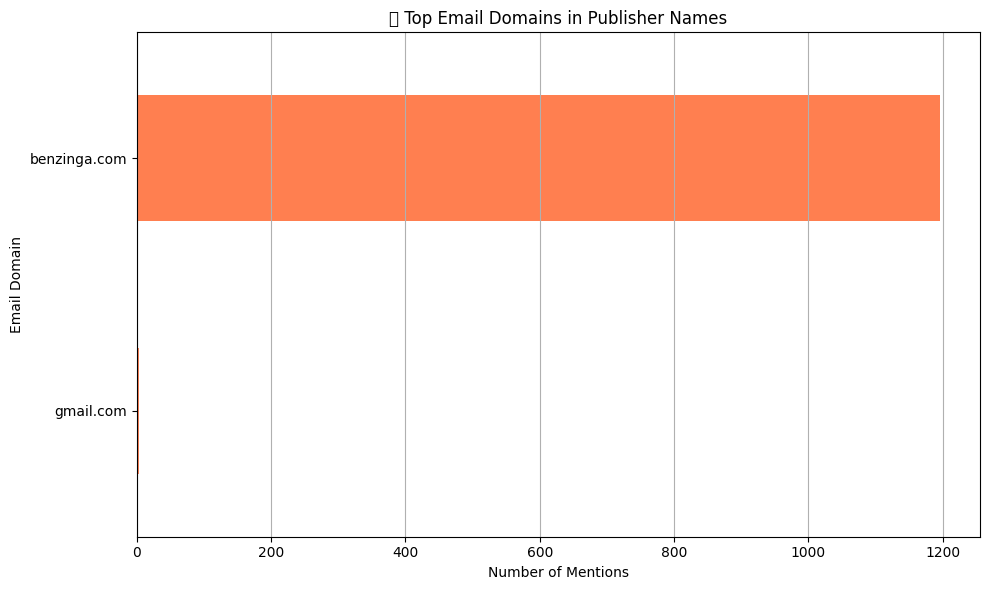

In [ ]:
# Check for emails
import re

df['email_domain'] = df['publisher'].apply(
    lambda x: re.search(r'@([\w\.-]+)', str(x)).group(1) if re.search(r'@[\w\.-]+', str(x)) else None
)

# Count top domains
email_domains = df['email_domain'].value_counts().dropna().head(10)

# Plot
email_domains.plot(kind='barh', figsize=(10, 6), color='coral')
plt.gca().invert_yaxis()
plt.title("Top Email Domains in Publisher Names")
plt.xlabel("Number of Mentions")
plt.ylabel("Email Domain")
plt.grid(axis='x')
plt.tight_layout()
plt.show()
